In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Processamento Digital de Imagens - AB2

Três tipos de curva (lago, baía e segmento de linha) úteis para diferenciar objetos diluídos em um imagem são mostradas na figura abaixo (na ordem, da esquerda para a direita). Baseando-se nas técnicas estudadas, desenvolva um algoritmo morfológico/lógico para diferenciar entre essas formas. A entrada $x$ para o seu algoritmo seria uma dessas três curvas. A saída deve corresponder ao tipo da entrada (_ie_., 1, 2 ou 3). Você pode assumir que as curvas têm 1 pixel de espessura e são totalmente conectados. Eles podem aparecer em qualquer orientação, portanto sua solução deve ser indepentente de rotação.

imagem.png

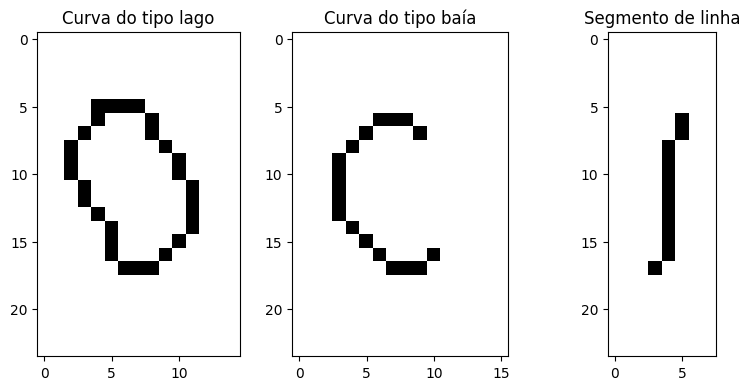

In [33]:
image = cv2.imread('imagem.png',0)
lago = image[:,5:20]
baia = image[:, 24:40]
seg_linha = image[:, 42:50]

fig, ax = plt.subplots(1, 3, figsize=(8, 4))

ax[0].imshow(lago, cmap="gray")
ax[0].set_title("Curva do tipo lago")

ax[1].imshow(baia, cmap="gray")
ax[1].set_title("Curva do tipo baía")


ax[2].imshow(seg_linha, cmap="gray")
ax[2].set_title("Segmento de linha")

plt.tight_layout()
plt.show()

In [56]:
import imutils

def detectar_curvas(imagem_cinza):

  ret, thresh = cv2.threshold(imagem_cinza, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU) 
  
  cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = imutils.grab_contours(cnts)
  c = max(cnts, key=cv2.contourArea)

  (x, y, w, h) = cv2.boundingRect(c)
  area = w*h
  
  # output = imagem_cinza.copy()
  # cv2.drawContours(output, [c], -1, (0, 255, 0), 1)
  # print(x, y, w, h)
  # print(w*h)
  # cv2.rectangle(output,(x,y),(x+w,y+h),(0,255,0),1)

  if area >= 100:
    curva = "Lago"
  elif area < 100 and area > 50:
    curva = "Baía"
  else:
    curva = "Segmento de linha"

  plt.imshow(imagem_cinza, cmap="gray")
  plt.title(f"Tipo de curva detectada: {curva}")
  plt.show()

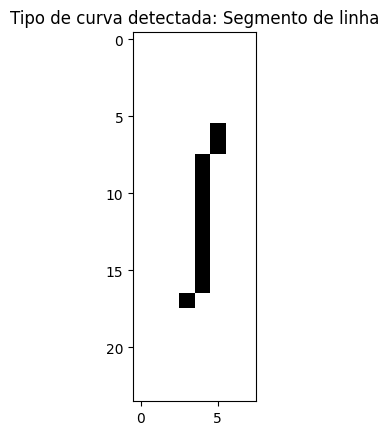

In [57]:
detectar_curvas(seg_linha)

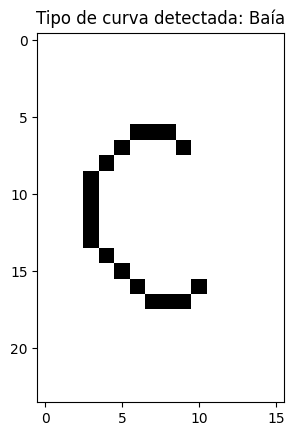

In [58]:
detectar_curvas(baia)

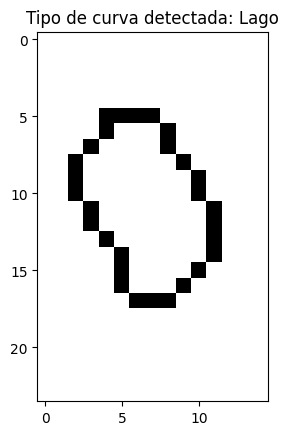

In [59]:
detectar_curvas(lago)

A imagem 'bgr_encoded.png' contém uma mensagem inserida numa fatia binária de um de seus canais. Obtenha essa mensagem.

In [ ]:
from PIL import Image

In [ ]:
def bit_slice(img):
    message_image = Image.new('1', img.size)
    message_pixels = message_image.load()

    width, height = img.size

    for x in range(width):
        for y in range(height):
            p = img.getpixel((x, y))
            lsb = p & 1
            message_pixels[x, y] = lsb

    return message_image

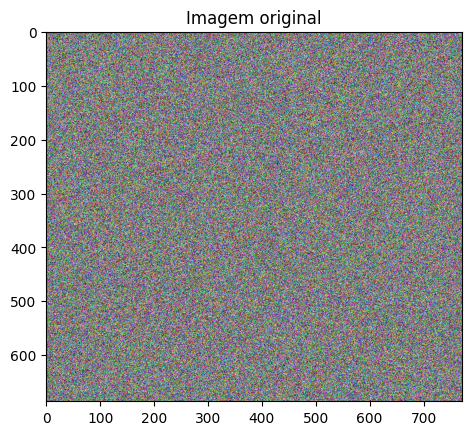

In [ ]:
img = Image.open('/content/bgr_encoded.png')

plt.imshow(img)
plt.title("Imagem original")
plt.show()

In [ ]:
r,g,b = img.split()

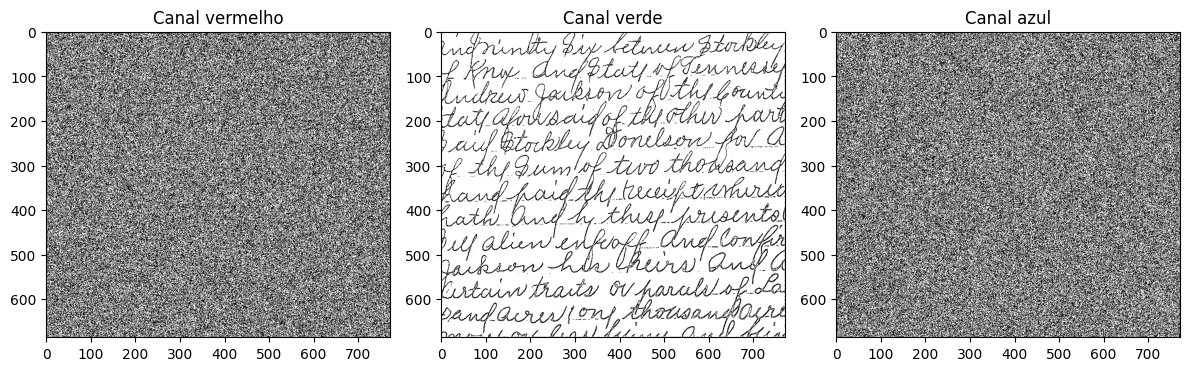

In [ ]:
red_img = bit_slice(r)
green_img = bit_slice(g)
blue_img = bit_slice(b)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(red_img)
ax[0].set_title("Canal vermelho")

ax[1].imshow(green_img)
ax[1].set_title("Canal verde")


ax[2].imshow(blue_img)
ax[2].set_title("Canal azul")

plt.tight_layout()
plt.show()

A primeira etapa de pré-processamento da imagem 'redacao.png' deve ser a localização das linhas pretas para extração de subimagens que contenham o texto de cada linha da redação manuscrita. Segmente as imagens da redação para obter um resultado similar ao da imagem 'redacao_linhas.png'.

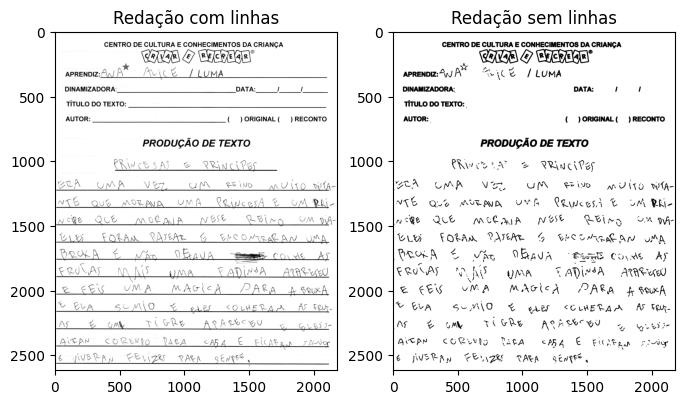

In [ ]:
redacao = cv2.imread("/content/redacao.png")
redacao = cv2.cvtColor(redacao, cv2.COLOR_RGB2GRAY)

redacao_sem_pauta = cv2.imread("/content/reacao_sem_pauta.png")
redacao_sem_pauta = cv2.cvtColor(redacao_sem_pauta, cv2.COLOR_RGB2GRAY)

fig, ax = plt.subplots(1, 2, figsize=(8, 12))

ax[0].imshow(redacao, cmap="gray")
ax[0].set_title("Redação com linhas")

ax[1].imshow(redacao_sem_pauta, cmap="gray")
ax[1].set_title("Redação sem linhas")

plt.show()

In [ ]:
redacao = cv2.imread('/content/redacao.png', 0)
redacao_resultado = cv2.imread('/content/reacao_sem_pauta.png', 0)
redacao_branco = np.zeros(redacao.shape)

# Algoritmo Canny para detectar as bordas
edges = cv2.Canny(redacao, 50, 150)

# Encontrar as linhas usando a transformada de Hough
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)

# Desenha as linhas encontradas na imagem
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(redacao_resultado, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.line(redacao_branco, (x1, y1), (x2, y2), (255, 255, 255), 2)

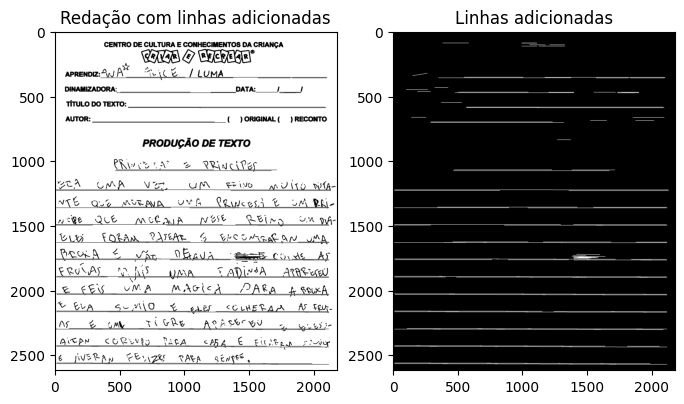

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8, 12))

ax[0].imshow(redacao_resultado, cmap="gray")
ax[0].set_title("Redação com linhas adicionadas")

ax[1].imshow(redacao_branco, cmap="gray")
ax[1].set_title("Linhas adicionadas")

plt.show()